In [1]:
import pandas as pd
import numpy as np

# Configurando semente para resultados constantes
np.random.seed(42)

# Criando dados de 500 produtos
n_produtos = 500
data = {
    'id_produto': range(1, n_produtos + 1),
    'categoria': np.random.choice(['Eletrônicos', 'Alimentos', 'Limpeza', 'Vestuário'], n_produtos),
    'vendas_mensais': np.random.poisson(50, n_produtos),
    'estoque_atual': np.random.randint(10, 200, n_produtos),
    'preco_unitario': np.random.uniform(10, 500, n_produtos).round(2),
    'lead_time_fornecedor': np.random.randint(2, 20, n_produtos), # Dias para entrega
    'custo_armazenamento': np.random.uniform(1, 10, n_produtos).round(2)
}

df = pd.DataFrame(data)

# Criando uma coluna de "Ruptura" (Falta de estoque fictícia)
df['risco_ruptura'] = np.where(df['estoque_atual'] < (df['vendas_mensais'] * 0.5), 1, 0)

# Salvar o arquivo
df.to_csv('estoque.csv', index=False)
print("Arquivo estoque.csv gerado com sucesso!")

Arquivo estoque.csv gerado com sucesso!


--- Estatísticas Descritivas ---
       id_produto  vendas_mensais  estoque_atual  preco_unitario  \
count  500.000000      500.000000     500.000000      500.000000   
mean   250.500000       49.600000     105.512000      248.874580   
std    144.481833        7.549702      54.855557      143.833507   
min      1.000000       29.000000      11.000000       10.090000   
25%    125.750000       44.000000      57.750000      120.885000   
50%    250.500000       50.000000     108.000000      244.545000   
75%    375.250000       54.000000     154.000000      375.660000   
max    500.000000       72.000000     199.000000      498.570000   

       lead_time_fornecedor  custo_armazenamento  risco_ruptura  
count            500.000000           500.000000     500.000000  
mean              10.512000             5.616740       0.088000  
std                5.184555             2.566943       0.283579  
min                2.000000             1.000000       0.000000  
25%                6.000

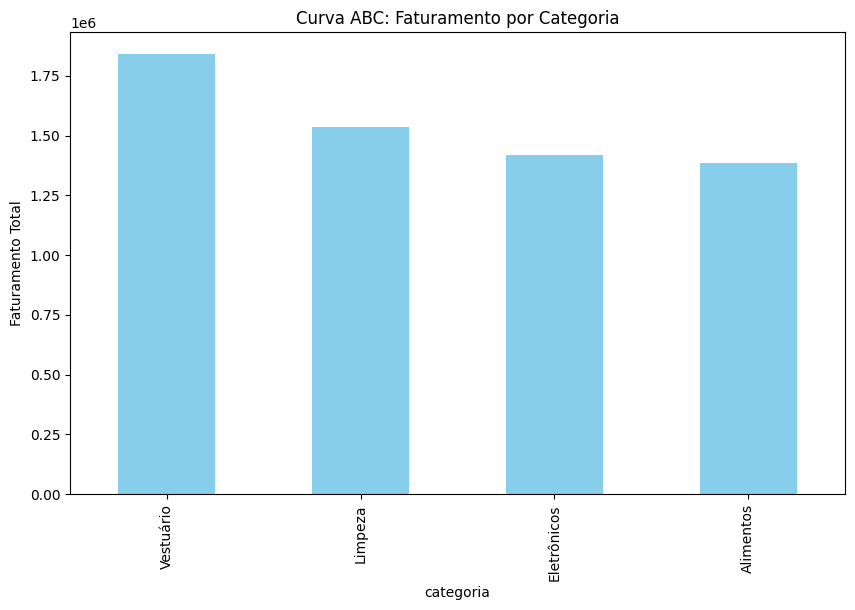

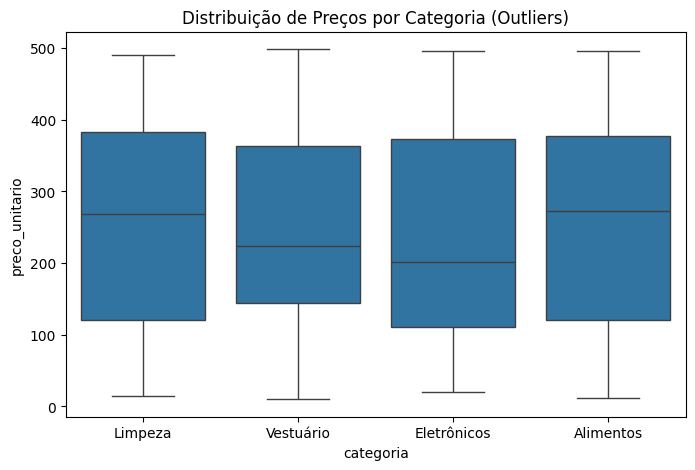


--- Desempenho dos Modelos ---
Regressão Linear - Erro Médio (MAE): 6.66
Random Forest - Erro Médio (MAE): 6.90


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. CARREGAMENTO DOS DADOS
df = pd.read_csv('estoque.csv')

# 2. ANÁLISE EXPLORATÓRIA (EDA)
print("--- Estatísticas Descritivas ---")
print(df.describe())

# Gráfico 1: Curva ABC (Faturamento por Categoria)
plt.figure(figsize=(10, 6))
df['faturamento_estimado'] = df['vendas_mensais'] * df['preco_unitario']
abc = df.groupby('categoria')['faturamento_estimado'].sum().sort_values(ascending=False)
abc.plot(kind='bar', color='skyblue')
plt.title('Curva ABC: Faturamento por Categoria')
plt.ylabel('Faturamento Total')
plt.show()

# Gráfico 2: Identificação de Outliers no Preço
plt.figure(figsize=(8, 5))
sns.boxplot(x='categoria', y='preco_unitario', data=df)
plt.title('Distribuição de Preços por Categoria (Outliers)')
plt.show()

# 3. PRÉ-PROCESSAMENTO
# Transformando categorias em números (Dummy encoding)
df_ml = pd.get_dummies(df, columns=['categoria'])

# Definindo Variáveis de Entrada (X) e Alvo (y)
# Queremos prever 'vendas_mensais' para planejar o estoque
X = df_ml.drop(['id_produto', 'vendas_mensais', 'faturamento_estimado', 'risco_ruptura'], axis=1)
y = df_ml['vendas_mensais']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. MODELAGEM (Comparando 2 modelos)

# Modelo 1: Regressão Linear (Baseline)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

# Modelo 2: Random Forest (Mais complexo)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

# 5. AVALIAÇÃO DE DESEMPENHO
print("\n--- Desempenho dos Modelos ---")
print(f"Regressão Linear - Erro Médio (MAE): {mean_absolute_error(y_test, pred_lr):.2f}")
print(f"Random Forest - Erro Médio (MAE): {mean_absolute_error(y_test, pred_rf):.2f}")

/tmp/ipython-input-3898947054.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=abc_data, x='categoria', y='faturamento_estimado', palette='viridis')


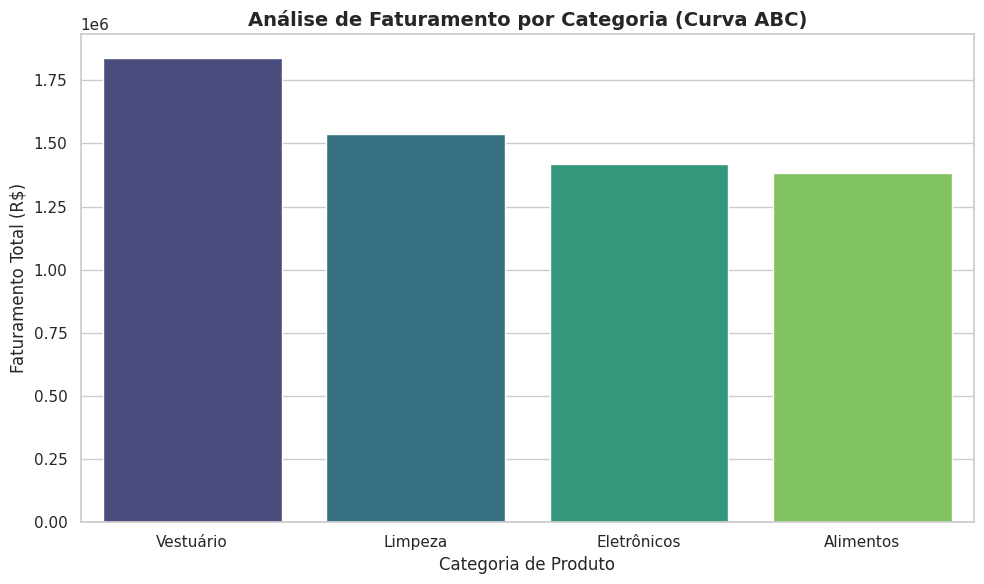

/tmp/ipython-input-3898947054.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='categoria', y='preco_unitario', palette='Set2')


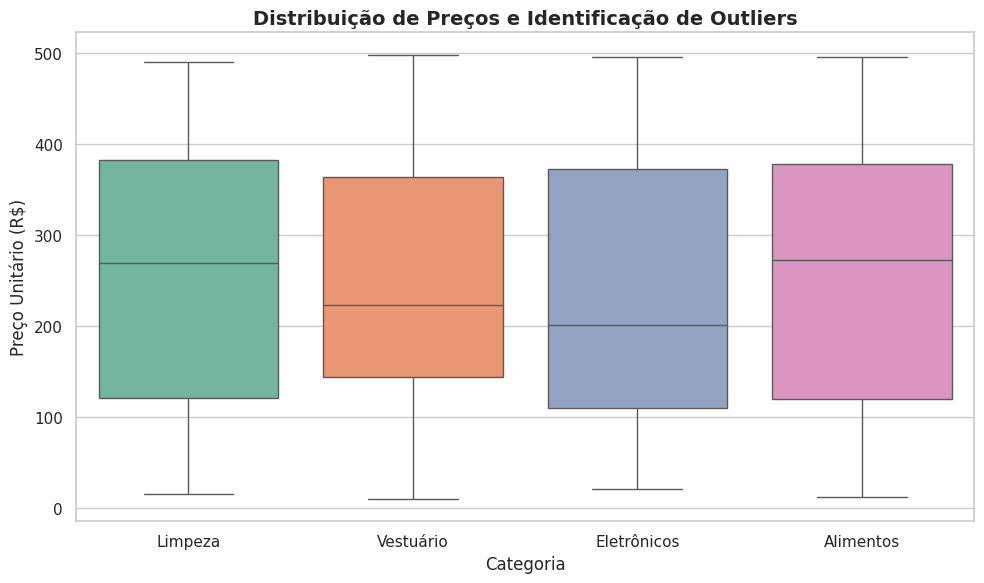

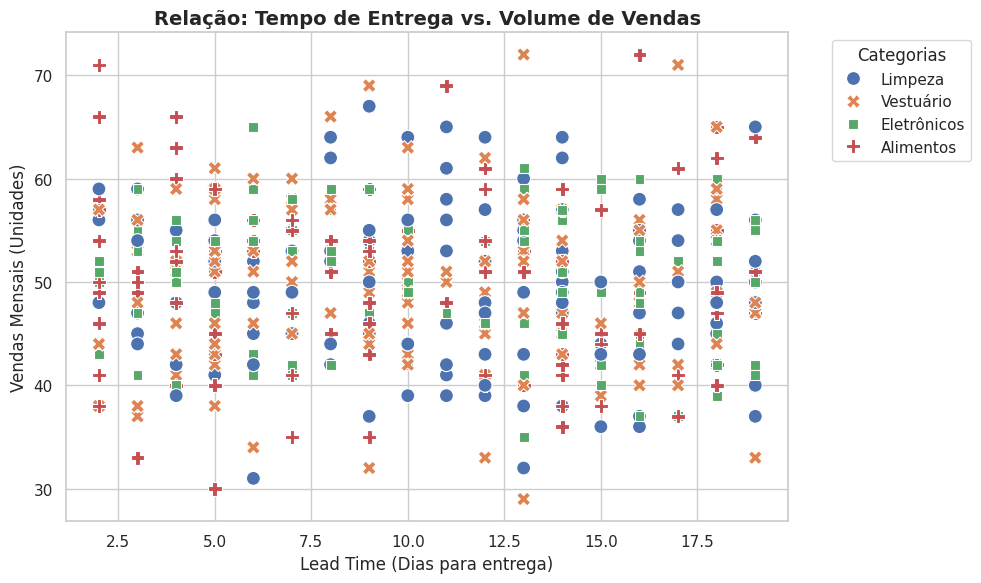

Gráficos gerados e salvos com sucesso!


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar os dados (Certifique-se de que o arquivo estoque.csv está na mesma pasta)
df = pd.read_csv('estoque.csv')

# --- CONFIGURAÇÃO VISUAL ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- GRÁFICO 1: CURVA ABC (Faturamento por Categoria) ---
# Criando a coluna de faturamento para a análise
df['faturamento_estimado'] = df['vendas_mensais'] * df['preco_unitario']

plt.figure()
abc_data = df.groupby('categoria')['faturamento_estimado'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=abc_data, x='categoria', y='faturamento_estimado', palette='viridis')

plt.title('Análise de Faturamento por Categoria (Curva ABC)', fontsize=14, fontweight='bold')
plt.xlabel('Categoria de Produto', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.tight_layout()
plt.savefig('grafico_abc.png', dpi=300) # Salva a imagem para você usar no PDF
plt.show()

# --- GRÁFICO 2: BOXPLOT (Identificação de Outliers de Preço) ---
plt.figure()
sns.boxplot(data=df, x='categoria', y='preco_unitario', palette='Set2')

plt.title('Distribuição de Preços e Identificação de Outliers', fontsize=14, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Preço Unitário (R$)', fontsize=12)
plt.tight_layout()
plt.savefig('grafico_boxplot.png', dpi=300) # Salva a imagem para o PDF
plt.show()

# --- GRÁFICO 3: LEAD TIME VS VENDAS (Tendência de Operação) ---
plt.figure()
sns.scatterplot(data=df, x='lead_time_fornecedor', y='vendas_mensais', hue='categoria', style='categoria', s=100)

plt.title('Relação: Tempo de Entrega vs. Volume de Vendas', fontsize=14, fontweight='bold')
plt.xlabel('Lead Time (Dias para entrega)', fontsize=12)
plt.ylabel('Vendas Mensais (Unidades)', fontsize=12)
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('grafico_scatter.png', dpi=300) # Salva a imagem para o PDF
plt.show()

print("Gráficos gerados e salvos com sucesso!")